In [295]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
#import classes from iImage.py file
from iImage import iImage, iImageFFT, inverseFilter, wienerFilter, constrainedLS
import numpy as np, matplotlib.pyplot as plt
from skimage.measure import compare_psnr, compare_ssim
import numpy.fft as fp

### Importing images with custom `iImage` class

In [72]:
originalImage=iImage.load("Original_Images/GroundTruth4.jpg")
flt=iImage.load("Kernels/Kernel4.png")

### `degrade` method takes in Ground Truth Image, and a filter in any subclass of `iIMageFFT` class

iImageFFT class is the base class for handelling all 1 channel images in FFT Domain. fft of the kernel(padded before taking fft) is passed to this method.

In [73]:
def degrade(image:np.ndarray, flt:iImageFFT, noise_mean=0, noise_std=255/12)->np.ndarray:
    degraded3d=image.copy()
    degraded3d=np.moveaxis(degraded3d, 2,0)
    degraded3d=fp.fft2(degraded3d)
    degraded3d*=abs(flt.image)
    degraded3d=fp.ifft2(degraded3d).real
    degraded3d=np.moveaxis(degraded3d, 0, 2)
    noise=np.random.normal(noise_mean, noise_std, image.shape)
    degraded3d+=noise
    degraded3d-=degraded3d.min()
    degraded3d*=255/degraded3d.max()
    return degraded3d.astype("uint8")

### `deBlur` method takes in a degraded image in numpy array, and restoration Filter of any of the subclasses of `iImageFFT` namely `inverseFilter`, `WienerFilter`, `constrainedFilter`.
`inverseFilter` is used as the base class for the other two filter classes in `iImage.py` namely `wienerFilter` and `constrainedLS`, hence is the parent class for all the deblur filters.

In [74]:
def deBlur(image:np.ndarray, fltImage:inverseFilter)->np.ndarray:
    cleaned3d=image.copy()
    cleaned3d=np.moveaxis(cleaned3d, 2, 0)
    cleaned3dI=fp.fft2(cleaned3d)
    cleaned3dI*=abs(fltImage.image)
    cleaned3d=fp.ifft2(cleaned3dI).real
    cleaned3d=np.moveaxis(cleaned3d, 0, 2)
    cleaned3d-=cleaned3d.min()
    cleaned3d/=cleaned3d.max()
    cleaned3d*=255
    cleaned3d=cleaned3d.astype("uint8")
    return cleaned3d


Degraded SSIM: 0.784
Degraded PSNR: 25.519
Cleaned SSIM: 0.906
Cleaned PSNR: 28.956


Text(0.5,1,'Cleaned Image \n PSNR: 28.956  SSIM: 0.906')

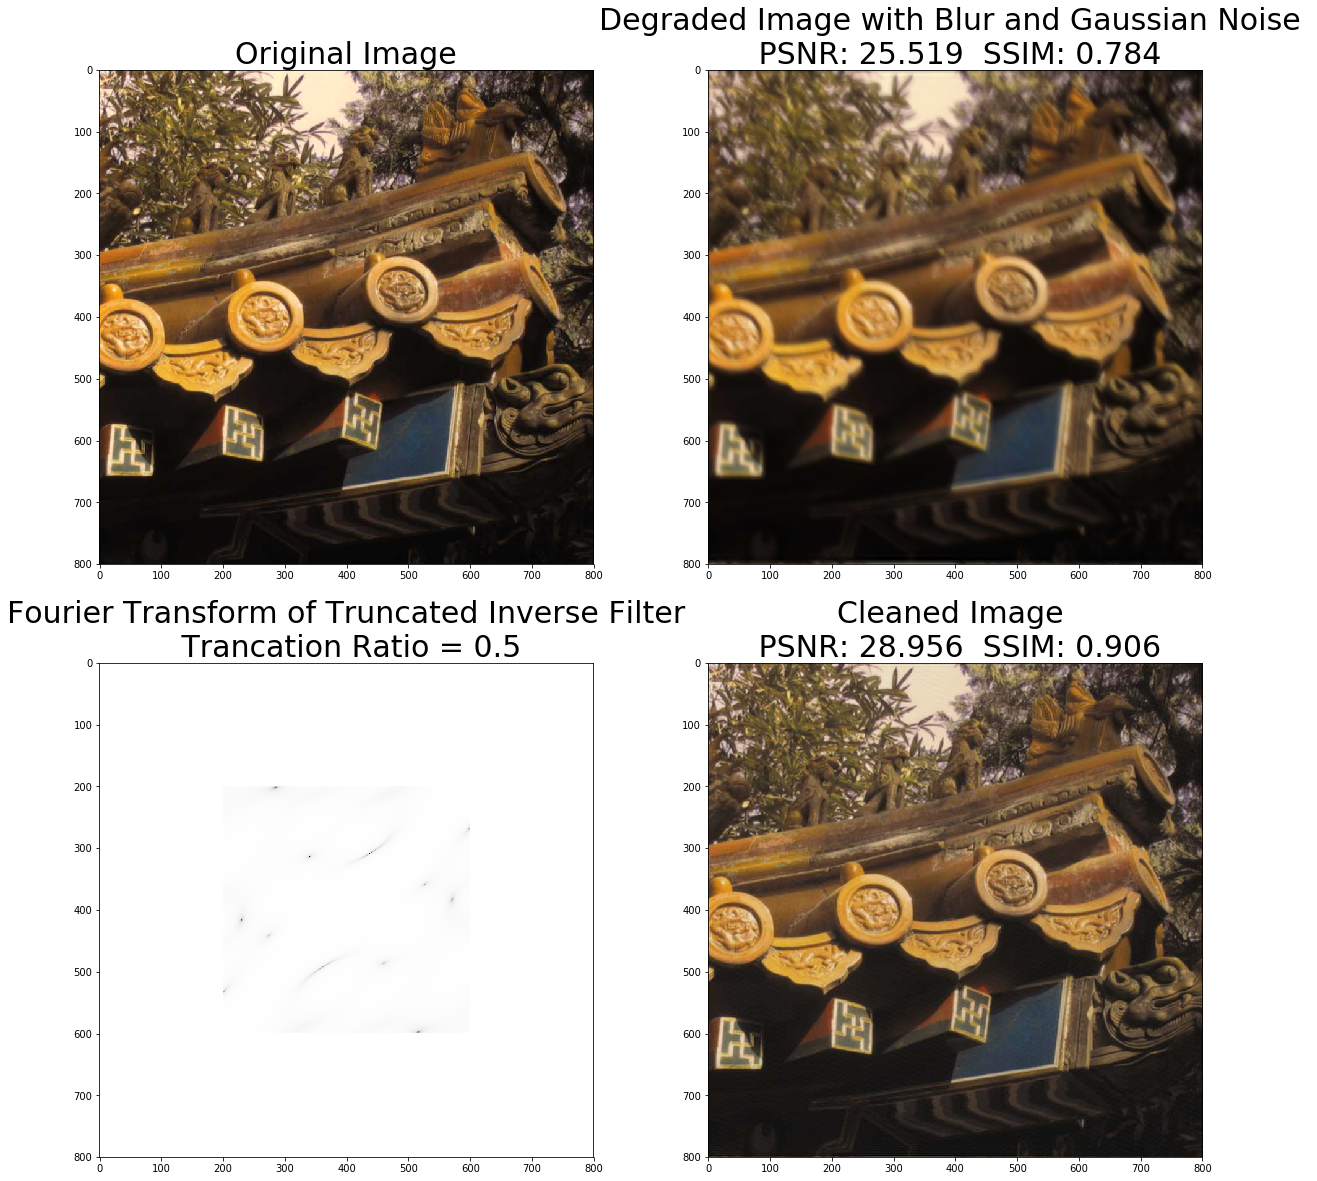

In [111]:
cleaningFilter=inverseFilter(flt, target=originalImage,threshold=0.5)
blurFilter=flt.pad(target=originalImage).fft()

degradedImage=degrade(originalImage.RGBImage, flt=blurFilter)
cleanedImage=deBlur(degradedImage, cleaningFilter)
old_psnr=round(compare_psnr(originalImage.RGBImage, degradedImage),3)
old_ssim=round(compare_ssim(originalImage.RGBImage, degradedImage,multichannel=True),3)
new_psnr=round(compare_psnr(originalImage.RGBImage, cleanedImage),3)
new_ssim=round(compare_ssim(originalImage.RGBImage, cleanedImage,multichannel=True),3)
print(f"Degraded SSIM: {old_ssim}")
print(f"Degraded PSNR: {old_psnr}")
print(f"Cleaned SSIM: {new_ssim}")
print(f"Cleaned PSNR: {new_psnr}")
f,((ax1,ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(20,20))
ax1.imshow(originalImage.RGBImage)
ax1.set_title("Original Image", fontsize=30)
ax2.imshow(degradedImage)
ax2.set_title(f"Degraded Image with Blur and Gaussian Noise \n PSNR: {old_psnr}  SSIM: {old_ssim}", fontsize=30)
# iImage(degradedImage).fft().show(ax3)
# ax3.set_title("Fourier transform of Degraded Image", fontsize=30)
cleaningFilter.show(ax3)
ax3.set_title(f"Fourier Transform of {cleaningFilter.getName()}\n {cleaningFilter.getParam()}", fontsize=30)
ax4.imshow(cleanedImage)
ax4.set_title(f"Cleaned Image \n PSNR: {new_psnr}  SSIM: {new_ssim}", fontsize=30)
# f.savefig(f"compare_images/{cleaningFilter.getName()}_{cleaningFilter.getParam()}.png")

here, blurFilter is actually the loaded filter tile, padded to target size within the `iImage` class from `iImage.py` and then converted to `iImageFFT` class by `iImage.fft()` method.

Image is cleaned by the `cleaningFilter` that an be either of class `wienerFilter`, `inverseFilter` or `constrainedLS` and takes the corrosponding parameters `k`, `threshold` and `gamma` respectively.

Degraded SSIM: 0.784
Degraded PSNR: 25.519
Cleaned SSIM: 0.95
Cleaned PSNR: 34.635


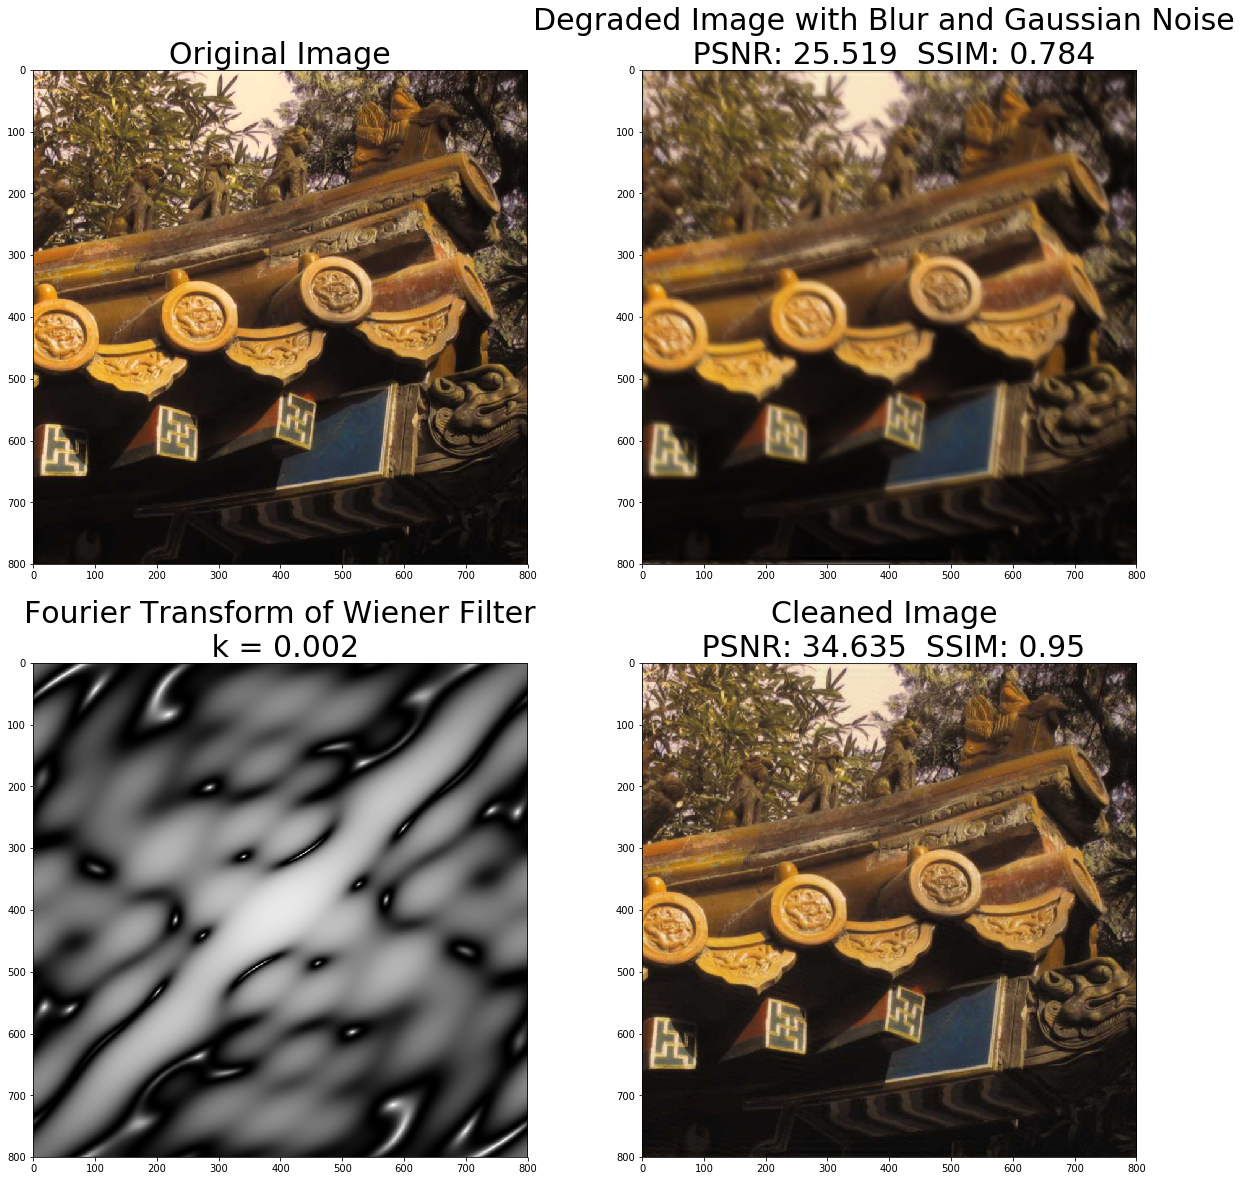

In [95]:
cleaningFilter=wienerFilter(flt, target=originalImage,k=0.002)
blurFilter=flt.pad(target=originalImage).fft()

degradedImage=degrade(originalImage.RGBImage, flt=blurFilter)
cleanedImage=deBlur(degradedImage, cleaningFilter)
old_psnr=round(compare_psnr(originalImage.RGBImage, degradedImage),3)
old_ssim=round(compare_ssim(originalImage.RGBImage, degradedImage,multichannel=True),3)
new_psnr=round(compare_psnr(originalImage.RGBImage, cleanedImage),3)
new_ssim=round(compare_ssim(originalImage.RGBImage, cleanedImage,multichannel=True),3)
print(f"Degraded SSIM: {old_ssim}")
print(f"Degraded PSNR: {old_psnr}")
print(f"Cleaned SSIM: {new_ssim}")
print(f"Cleaned PSNR: {new_psnr}")
f,((ax1,ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(20,20))
ax1.imshow(originalImage.RGBImage)
ax1.set_title("Original Image", fontsize=30)
ax2.imshow(degradedImage)
ax2.set_title(f"Degraded Image with Blur and Gaussian Noise \n PSNR: {old_psnr}  SSIM: {old_ssim}", fontsize=30)
# iImage(degradedImage).fft().show(ax3)
# ax3.set_title("Fourier transform of Degraded Image", fontsize=30)
cleaningFilter.show(ax3)
ax3.set_title(f"Fourier Transform of {cleaningFilter.getName()}\n {cleaningFilter.getParam()}", fontsize=30)
ax4.imshow(cleanedImage)
ax4.set_title(f"Cleaned Image \n PSNR: {new_psnr}  SSIM: {new_ssim}", fontsize=30)
f.savefig(f"compare_images/{cleaningFilter.getName()}_{cleaningFilter.getParam()}.png")

#### The Same above Image is cleaned by `constrainedLS` filter with a fairly different Fourier Filter as below

Degraded SSIM: 0.785
Degraded PSNR: 25.519
Cleaned SSIM: 0.956
Cleaned PSNR: 34.549


Text(0.5,1,'Cleaned Image \n PSNR: 34.549  SSIM: 0.956')

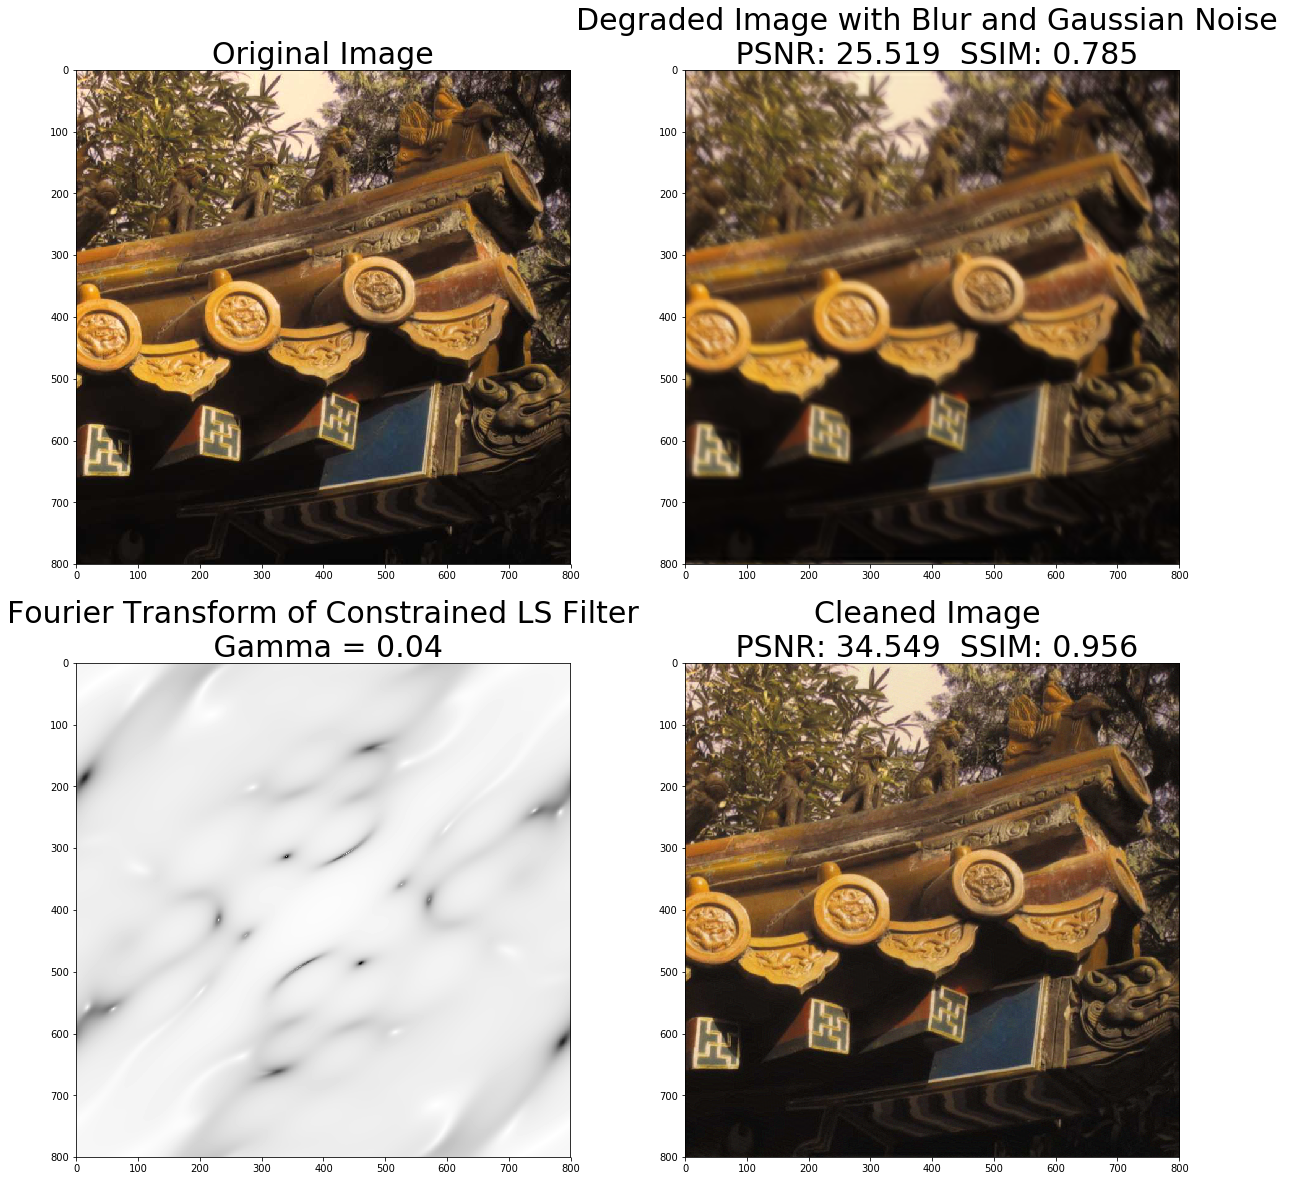

In [110]:
cleaningFilter=constrainedLS(flt, target=originalImage,gamma=0.04)
blurFilter=flt.pad(target=originalImage).fft()

degradedImage=degrade(originalImage.RGBImage, flt=blurFilter)
cleanedImage=deBlur(degradedImage, cleaningFilter)
old_psnr=round(compare_psnr(originalImage.RGBImage, degradedImage),3)
old_ssim=round(compare_ssim(originalImage.RGBImage, degradedImage,multichannel=True),3)
new_psnr=round(compare_psnr(originalImage.RGBImage, cleanedImage),3)
new_ssim=round(compare_ssim(originalImage.RGBImage, cleanedImage,multichannel=True),3)
print(f"Degraded SSIM: {old_ssim}")
print(f"Degraded PSNR: {old_psnr}")
print(f"Cleaned SSIM: {new_ssim}")
print(f"Cleaned PSNR: {new_psnr}")
f,((ax1,ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(20,20))
ax1.imshow(originalImage.RGBImage)
ax1.set_title("Original Image", fontsize=30)
ax2.imshow(degradedImage)
ax2.set_title(f"Degraded Image with Blur and Gaussian Noise \n PSNR: {old_psnr}  SSIM: {old_ssim}", fontsize=30)
# iImage(degradedImage).fft().show(ax3)
# ax3.set_title("Fourier transform of Degraded Image", fontsize=30)
cleaningFilter.show(ax3)
ax3.set_title(f"Fourier Transform of {cleaningFilter.getName()}\n {cleaningFilter.getParam()}", fontsize=30)
ax4.imshow(cleanedImage)
ax4.set_title(f"Cleaned Image \n PSNR: {new_psnr}  SSIM: {new_ssim}", fontsize=30)
# f.savefig(f"compare_images/{cleaningFilter.getName()}_{cleaningFilter.getParam()}.png")